In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the number of arms
n = np.random.choice([8, 10])

In [3]:
# Define the number of time steps and runs
num_steps = 1000
num_runs = 2000

In [4]:
# Define the epsilon values for the epsilon-greedy strategy
epsilon_list = [0.1, 0.01, 0]

In [5]:
# Initialize the true reward distribution for each arm
q_star = np.random.normal(size=n)
# q_star = np.random.normal(0, 1, n)

In [6]:
# Initialize the estimate of the true reward distribution for each arm
q_est = np.zeros(n)

In [7]:
# Initialize the action count for each arm
action_count = np.zeros(n)

In [8]:
# Initialize the total reward for each epsilon value and run
total_reward = np.zeros((len(epsilon_list), num_runs, num_steps))

In [9]:
# Run the epsilon-greedy algorithm for multiple runs and epsilon values
for i, epsilon in enumerate(epsilon_list):

    for run in range(num_runs):

        # Initialize the reward for each step
        reward = np.zeros(num_steps)

        for step in range(num_steps):

            # Select an arm to pull using the epsilon-greedy strategy
            if np.random.random() < epsilon:
                # Choose a random arm to encourage exploration
                arm = np.random.choice(n)
            else:
                # Choose the arm with the highest estimated value to encourage exploitation
                arm = np.argmax(q_est)

            # Pull the chosen arm and observe the reward
            reward[step] = np.random.normal(q_star[arm])

            # Update the estimate of the true reward distribution for the chosen arm using the sample average method
            action_count[arm] += 1
            q_est[arm] += (1/action_count[arm])*(reward[step] - q_est[arm])

        # Accumulate the total reward for each run and epsilon value
        total_reward[i, run] = reward

# Compute the average reward over multiple runs and epsilon values
average_reward = np.mean(total_reward, axis=1)


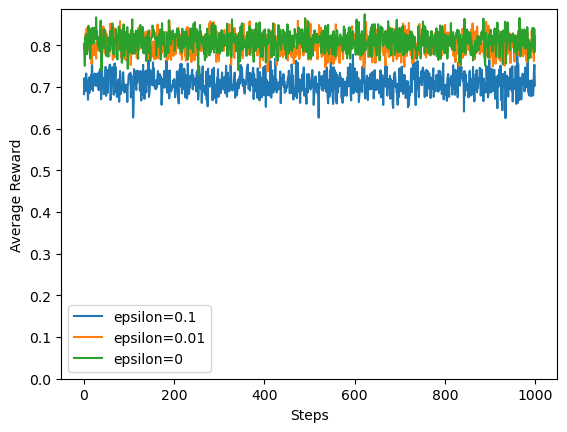

In [10]:
# Plot the results
for i, epsilon in enumerate(epsilon_list):
    plt.plot(average_reward[i], label='epsilon={}'.format(epsilon))

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.ylim(0)
plt.show()